# Suicide vs GDP at the State Level (United States of America)

In [1]:
# dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

## Data exploration and Cleanup

### Read CSVs

In [2]:
# https://apps.bea.gov/regional/downloadzip.cfm - website for below info
# read in GDP csv into notebook
gdp_file = "BEA_GDP_DATA_mulitple_years.csv"
df_state_gdp = pd.read_csv(gdp_file)
df_state_gdp.head()

,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,1997,1998,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,"""00000""",United States,,SAGDP1,1.0,...,Real GDP (millions of chained 2012 dollars),Millions of chained 2012 dollars,1.152916e+07,12045824.00,...,16253970.0,1.655335e+07,1.693205e+07,1.739030e+07,1.768027e+07,1.807908e+07,1.860679e+07,1.903267e+07,1.838469e+07,19427287.0
1,"""00000""",United States,,SAGDP1,2.0,...,Chain-type quantity indexes for real GDP,Quantity index,7.093100e+01,74.11,...,100.0,1.018420e+02,1.041720e+02,1.069910e+02,1.087750e+02,1.112290e+02,1.144750e+02,1.170960e+02,1.131090e+02,119.523
2,"""00000""",United States,,SAGDP1,3.0,...,Current-dollar GDP (millions of current dollars),Millions of current dollars,8.577552e+06,9062817.00,...,16253970.0,1.684320e+07,1.755069e+07,1.820602e+07,1.869511e+07,1.947962e+07,2.052716e+07,2.137258e+07,2.089375e+07,22996086.0
3,"""00000""",United States,,SAGDP1,4.0,...,Compensation (millions of dollars),Millions of current dollars,4.713220e+06,5075701.00,...,8575362.0,8.843637e+06,9.259654e+06,9.709535e+06,9.977096e+06,1.043674e+07,1.096981e+07,1.145945e+07,1.158009e+07,(NA)
4,"""00000""",United States,,SAGDP1,5.0,...,Gross operating surplus (millions of dollars),Millions of current dollars,3.286531e+06,3384012.00,...,6600532.0,6.870613e+06,7.108287e+06,7.278526e+06,7.468126e+06,7.736436e+06,8.158931e+06,8.453733e+06,8.540393e+06,(NA)


In [3]:
# read in suicide rate csv
sui_file = "suicide_rate_state.csv"
sui_df = pd.read_csv(sui_file)
sui_df.head()

,Unnamed: 0,State,Year,Deaths,Population,Crude Rate
0,NaN,Alabama,1999,554,4430141,12.5
1,NaN,Alabama,2000,582,4447100,13.1
2,NaN,Alabama,2001,512,4467634,11.5
3,NaN,Alabama,2002,513,4480089,11.5
4,NaN,Alabama,2003,520,4503491,11.5


### Perform cleanup on GDP DataFrame

In [4]:
#drop NA info
df_state_gdp = df_state_gdp.dropna()
# remove rows besides the REAL GDP row associated with LineCode 1.0
df_state_gdp = df_state_gdp.loc[df_state_gdp["LineCode"] == 1.0, :]
df_state_gdp.head(40)

,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,1997,1998,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,"""00000""",United States,,SAGDP1,1.0,...,Real GDP (millions of chained 2012 dollars),Millions of chained 2012 dollars,11529157.0,12045824.0,...,16253970.0,16553348.0,16932051.0,17390295.0,17680274.0,18079084.0,18606787.0,19032672.0,18384687.0,19427287.0
8,"""01000""",Alabama,5,SAGDP1,1.0,...,Real GDP (millions of chained 2012 dollars),Millions of chained 2012 dollars,144501.2,149568.2,...,189245.5,191369.8,189886.3,191335.2,194283.8,197566.6,200800.9,203383.9,196906.1,204884.6
16,"""02000""",Alaska,8,SAGDP1,1.0,...,Real GDP (millions of chained 2012 dollars),Millions of chained 2012 dollars,42211.3,41095.9,...,58283.6,55354.3,54188.2,54740.8,54246.6,54129.5,53249.6,53336.5,50161.0,50300.3
24,"""04000""",Arizona,6,SAGDP1,1.0,...,Real GDP (millions of chained 2012 dollars),Millions of chained 2012 dollars,168408.8,183060.5,...,271440.0,273481.9,276948.9,282577.0,291275.2,302455.4,313618.7,323894.3,320550.6,337424.7
32,"""05000""",Arkansas,5,SAGDP1,1.0,...,Real GDP (millions of chained 2012 dollars),Millions of chained 2012 dollars,82571.3,84570.8,...,108492.1,110752.4,111734.5,112351.0,112798.1,113885.2,115937.6,116790.9,114943.5,120710.5
40,"""06000""",California,8,SAGDP1,1.0,...,Real GDP (millions of chained 2012 dollars),Millions of chained 2012 dollars,1378276.5,1468730.8,...,2113096.4,2179229.0,2256054.7,2357452.9,2427894.6,2541769.3,2643576.3,2739343.4,2663665.9,2871424.2
48,"""08000""",Colorado,7,SAGDP1,1.0,...,Real GDP (millions of chained 2012 dollars),Millions of chained 2012 dollars,184185.3,200679.7,...,276823.1,286259.1,298655.3,312409.7,318953.4,329960.6,342535.9,356773.6,346011.3,365918.3
56,"""09000""",Connecticut,1,SAGDP1,1.0,...,Real GDP (millions of chained 2012 dollars),Millions of chained 2012 dollars,190518.9,196391.1,...,240911.9,236050.6,235780.9,242706.5,243286.7,247358.5,249998.1,251495.1,235888.6,245782.6
64,"""10000""",Delaware,2,SAGDP1,1.0,...,Real GDP (millions of chained 2012 dollars),Millions of chained 2012 dollars,45980.1,50434.3,...,62354.6,60235.8,64940.1,66793.5,63001.3,60801.2,61735.1,64262.4,62056.2,64338.0
72,"""11000""",District of Columbia,2,SAGDP1,1.0,...,Real GDP (millions of chained 2012 dollars),Millions of chained 2012 dollars,79827.7,81214.4,...,112157.0,112332.4,114553.6,116808.4,119644.3,120898.9,123836.1,124990.3,122342.1,125795.8


In [5]:
# drop additional columns
df_state_gdp = df_state_gdp.drop(columns = {"LineCode", "TableName", "Region", "GeoFIPS"})

In [6]:
# melt all the row columns so they are rows within the DF
state_gdp_melt = df_state_gdp.melt(id_vars=['GeoName', 'Description', "Unit"], 
              value_vars=['1997','1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021'],
              var_name='Year', value_name='GDP')
state_gdp_melt

,GeoName,Description,Unit,Year,GDP
0,United States,Real GDP (millions of chained 2012 dollars),Millions of chained 2012 dollars,1997,11529157.0
1,Alabama,Real GDP (millions of chained 2012 dollars),Millions of chained 2012 dollars,1997,144501.2
2,Alaska,Real GDP (millions of chained 2012 dollars),Millions of chained 2012 dollars,1997,42211.3
3,Arizona,Real GDP (millions of chained 2012 dollars),Millions of chained 2012 dollars,1997,168408.8
4,Arkansas,Real GDP (millions of chained 2012 dollars),Millions of chained 2012 dollars,1997,82571.3
...,...,...,...,...,...
1495,Plains,Real GDP (millions of chained 2012 dollars),Millions of chained 2012 dollars,2021,1212805.5
1496,Southeast,Real GDP (millions of chained 2012 dollars),Millions of chained 2012 dollars,2021,4094466.5
1497,Southwest,Real GDP (millions of chained 2012 dollars),Millions of chained 2012 dollars,2021,2461192.8
1498,Rocky Mountain,Real GDP (millions of chained 2012 dollars),Millions of chained 2012 dollars,2021,714148.4


In [7]:
# drop the additonal description/unit columns - NOTE THAT THE GDP is in Millions
state_gdp_melt = state_gdp_melt.drop(columns = {"Description", "Unit"})

In [8]:
#drop year columns that the suicide CSV does not contain
state_gdp_melt = state_gdp_melt.loc[(state_gdp_melt["Year"] != "1997")]
state_gdp_melt = state_gdp_melt.loc[(state_gdp_melt["Year"] != "1998")]
state_gdp_melt = state_gdp_melt.loc[(state_gdp_melt["Year"] != "2021")]

#rename the Geoname column and GDP column
state_gdp_melt = state_gdp_melt.rename(columns = {"GeoName": "State", "GDP" :"GDP (in millions)"})

# locate and remove rows that are not States
state_gdp_melt = state_gdp_melt.loc[(state_gdp_melt["State"] != "United States")]
state_gdp_melt = state_gdp_melt.loc[(state_gdp_melt["State"] != "New England")]
state_gdp_melt = state_gdp_melt.loc[(state_gdp_melt["State"] != "Mideast")]
state_gdp_melt = state_gdp_melt.loc[(state_gdp_melt["State"] != "Great Lakes")]
state_gdp_melt = state_gdp_melt.loc[(state_gdp_melt["State"] != "Plains")]
state_gdp_melt = state_gdp_melt.loc[(state_gdp_melt["State"] != "Southeast")]
state_gdp_melt = state_gdp_melt.loc[(state_gdp_melt["State"] != "Southwest")]
state_gdp_melt = state_gdp_melt.loc[(state_gdp_melt["State"] != "Rocky Mountain")]
state_gdp_melt = state_gdp_melt.loc[(state_gdp_melt["State"] != "Far West")]
state_gdp_melt

,State,Year,GDP (in millions)
121,Alabama,1999,154900.2
122,Alaska,1999,40590.5
123,Arizona,1999,198699.9
124,Arkansas,1999,89115.2
125,California,1999,1574305.9
...,...,...,...
1427,Virginia,2020,473817.5
1428,Washington,2020,532861.9
1429,West Virginia,2020,69711.6
1430,Wisconsin,2020,291715.8


In [9]:
# modify year column to be integers
state_gdp_melt["Year"] = state_gdp_melt["Year"].astype(int)

### Perform Cleanup on Suicide Rate DataFrame

In [10]:
# drop unnecessary columns
sui_df = sui_df.drop(columns = {"Unnamed: 0"})

In [11]:
sui_df = sui_df.rename(columns = {"Crude Rate": "Suicide Rate"})
sui_df.head()

,State,Year,Deaths,Population,Suicide Rate
0,Alabama,1999,554,4430141,12.5
1,Alabama,2000,582,4447100,13.1
2,Alabama,2001,512,4467634,11.5
3,Alabama,2002,513,4480089,11.5
4,Alabama,2003,520,4503491,11.5


### Merge DataFrames

In [12]:
# merge suicide and gdp DFs on 
gdp_sui_state = pd.merge(state_gdp_melt, sui_df, on = ["State", "Year"], how = "inner")
gdp_sui_state

,State,Year,GDP (in millions),Deaths,Population,Suicide Rate
0,Alabama,1999,154900.2,554,4430141,12.5
1,Alaska,1999,40590.5,96,624779,15.4
2,Arizona,1999,198699.9,766,5023823,15.2
3,Arkansas,1999,89115.2,336,2651860,12.7
4,California,1999,1574305.9,3069,33499204,9.2
...,...,...,...,...,...,...
1117,Virginia,2020,473817.5,1201,8590563,14.0
1118,Washington,2020,532861.9,1212,7693612,15.8
1119,West Virginia,2020,69711.6,354,1784787,19.8
1120,Wisconsin,2020,291715.8,866,5832655,14.8


In [13]:
# make GDP a float
gdp_sui_state["GDP (in millions)"] = gdp_sui_state["GDP (in millions)"].astype(float)

### Add GDP Per Capita to DataFrame 

In [14]:
# add GDP per Capita column
gdp_sui_state["GDP Per Capita"] = round(((gdp_sui_state["GDP (in millions)"]*1000000)/gdp_sui_state["Population"]), 2)
gdp_sui_state

,State,Year,GDP (in millions),Deaths,Population,Suicide Rate,GDP Per Capita
0,Alabama,1999,154900.2,554,4430141,12.5,34965.07
1,Alaska,1999,40590.5,96,624779,15.4,64967.77
2,Arizona,1999,198699.9,766,5023823,15.2,39551.53
3,Arkansas,1999,89115.2,336,2651860,12.7,33604.79
4,California,1999,1574305.9,3069,33499204,9.2,46995.32
...,...,...,...,...,...,...,...
1117,Virginia,2020,473817.5,1201,8590563,14.0,55155.58
1118,Washington,2020,532861.9,1212,7693612,15.8,69260.30
1119,West Virginia,2020,69711.6,354,1784787,19.8,39058.78
1120,Wisconsin,2020,291715.8,866,5832655,14.8,50014.24


## Merged DataFrame Analysis

### Perform Multiple Scatter Plots in search of Observable Trends

SCATTER PLOT of GDP vs SUICIDE RATE (years = 1999 - 2020)

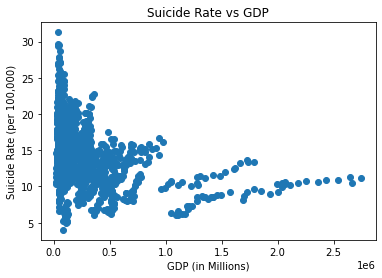

In [15]:
# scatter plot of all GDP and suicide rate (all years)
plt.scatter(gdp_sui_state["GDP (in millions)"], gdp_sui_state["Suicide Rate"])
plt.xlabel("GDP (in Millions)")
plt.ylabel("Suicide Rate (per 100,000)")
plt.title("Suicide Rate vs GDP")
plt.show()

In [16]:
gdp_sui_state_lower = gdp_sui_state.loc[gdp_sui_state["GDP (in millions)"] < 1000000, :]

SCATTER PLOT of GDP vs SUICIDE RATE for States with less than $1 Trillion GDP (years = 1999 - 2020)

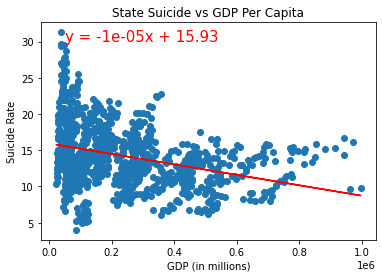

6.435009446930455e-28 -0.32777502380242035


In [17]:
# scatter plot of all GDP and suicide rate & GDP < $1 Trillion (all years)
x_values = gdp_sui_state_lower["GDP (in millions)"]
y_values = gdp_sui_state_lower["Suicide Rate"]

# perform linear regression equations
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,5)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50000,30),fontsize=15,color="red")
plt.xlabel('GDP (in millions)')
plt.ylabel('Suicide Rate')
plt.title("State Suicide vs GDP Per Capita")
plt.show()
print(pvalue, rvalue)

In [18]:
# make a DF for large GDP over 1 trillion
big_gdp_sui_state = gdp_sui_state.loc[gdp_sui_state["GDP (in millions)"] > 1000000, :]
big_gdp_sui_state.head()

,State,Year,GDP (in millions),Deaths,Population,Suicide Rate,GDP Per Capita
4,California,1999,1574305.9,3069,33499204,9.2,46995.32
32,New York,1999,1051337.6,1195,18882725,6.3,55677.22
55,California,2000,1696172.4,2963,33871648,8.7,50076.47
83,New York,2000,1092188.2,1131,18976457,6.0,57554.91
106,California,2001,1692324.1,2819,34479458,8.2,49082.10


SCATTER PLOT of GDP vs SUICIDE RATE for States with less than $1 Trillion GDP (years = 1999 - 2020)

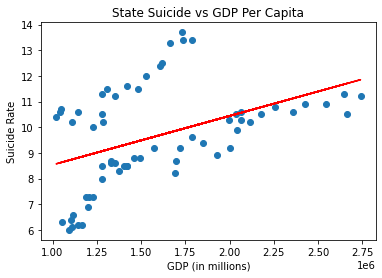

0.00021738408252147722 0.44646631305048584


In [19]:
# scatter plot of only large GDP
x_values = big_gdp_sui_state["GDP (in millions)"]
y_values = big_gdp_sui_state["Suicide Rate"]

# perform linear regression equations
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,5)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50000,30),fontsize=15,color="red")
plt.xlabel('GDP (in millions)')
plt.ylabel('Suicide Rate')
plt.title("State Suicide vs GDP Per Capita")
plt.show()
print(pvalue, rvalue)

NOTE: Plot just shows the results for New York, California, and Texas

In [20]:
# try a DF just by year
gdp_sui_state_year = gdp_sui_state.loc[gdp_sui_state["Year"] == 2020]

SCATTER PLOT of GDP vs SUICIDE RATE (year = 2020)

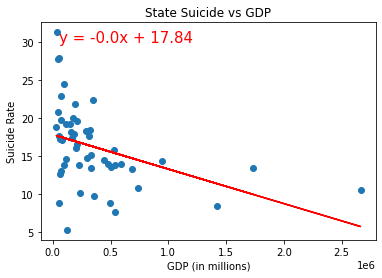

0.003246830859015032 -0.4044124332641531


In [21]:
# scatter plot of only large GDP
x_values = gdp_sui_state_year["GDP (in millions)"]
y_values = gdp_sui_state_year["Suicide Rate"]

# perform linear regression equations
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,5)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50000,30),fontsize=15,color="red")
plt.xlabel('GDP (in millions)')
plt.ylabel('Suicide Rate')
plt.title("State Suicide vs GDP")
plt.show()
print(pvalue, rvalue)

SCATTER PLOT of GDP PER CAPITA vs SUICIDE RATE (year = 1999 - 2020)

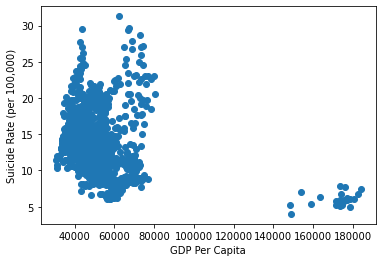

In [22]:
# try some plots in GDP Per Capita instead of total GDP

# scatter plot of all GDP per Capita and suicide rate (all years)
plt.scatter(gdp_sui_state["GDP Per Capita"], gdp_sui_state["Suicide Rate"])
plt.xlabel("GDP Per Capita")
plt.ylabel("Suicide Rate (per 100,000)")
plt.show()

In [23]:
# set up the values of the plot to help determine linear regression equation
gdp_sui_stat_DC = gdp_sui_state.loc[gdp_sui_state["State"] != "District of Columbia"]
gdp_sui_stat_DC.head()

,State,Year,GDP (in millions),Deaths,Population,Suicide Rate,GDP Per Capita
0,Alabama,1999,154900.2,554,4430141,12.5,34965.07
1,Alaska,1999,40590.5,96,624779,15.4,64967.77
2,Arizona,1999,198699.9,766,5023823,15.2,39551.53
3,Arkansas,1999,89115.2,336,2651860,12.7,33604.79
4,California,1999,1574305.9,3069,33499204,9.2,46995.32


SCATTER PLOT of GDP PER CAPITA vs SUICIDE RATE for GDP Per Capita < 100,000 (year = 1999 - 2020)

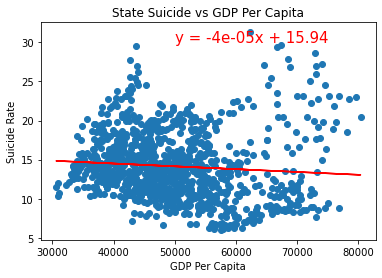

0.005706690190126309 -0.08329285964455299


In [24]:
x_values = gdp_sui_stat_DC["GDP Per Capita"]
y_values = gdp_sui_stat_DC["Suicide Rate"]

# perform linear regression equations
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,5)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50000,30),fontsize=15,color="red")
plt.xlabel('GDP Per Capita')
plt.ylabel('Suicide Rate')
plt.title("State Suicide vs GDP Per Capita")
plt.show()
print(pvalue, rvalue)

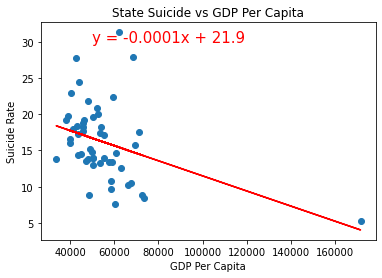

0.005532689296265285 -0.3830336699668297


In [25]:
# plot of 2020 GDP vs Suicide
x_values = gdp_sui_state_year["GDP Per Capita"]
y_values = gdp_sui_state_year["Suicide Rate"]

# perform linear regression equations
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,5)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50000,30),fontsize=15,color="red")
plt.xlabel('GDP Per Capita')
plt.ylabel('Suicide Rate')
plt.title("State Suicide vs GDP Per Capita")
plt.show()
print(pvalue, rvalue)

In [26]:
# try a DF just by State
gdp_sui_state_ST = gdp_sui_state.loc[gdp_sui_state["State"] == "Minnesota"]
gdp_sui_state_ST

,State,Year,GDP (in millions),Deaths,Population,Suicide Rate,GDP Per Capita
23,Minnesota,1999,232068.1,437,4873481,9.0,47618.55
74,Minnesota,2000,247802.6,440,4919479,8.9,50371.72
125,Minnesota,2001,247599.4,478,4982796,9.6,49690.86
176,Minnesota,2002,253478.4,494,5018935,9.8,50504.42
227,Minnesota,2003,264165.9,497,5053572,9.8,52273.11
278,Minnesota,2004,275560.1,522,5087713,10.3,54161.88
329,Minnesota,2005,284636.9,546,5119598,10.7,55597.51
380,Minnesota,2006,284382.0,554,5163555,10.7,55074.85
431,Minnesota,2007,286299.2,572,5207203,11.0,54981.38
482,Minnesota,2008,288420.6,595,5247018,11.3,54968.48


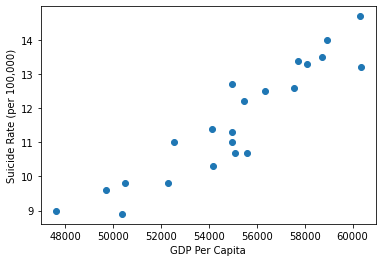

In [27]:
plt.scatter(gdp_sui_state_ST["GDP Per Capita"], gdp_sui_state_ST["Suicide Rate"])
plt.xlabel("GDP Per Capita")
plt.ylabel("Suicide Rate (per 100,000)")
plt.show()